In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import matplotlib.dates as mdates

%matplotlib inline

/home/ryohayama/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
d = pd.read_csv('semiannual_inflation.csv')

In [3]:
d.loc[0::2, 'year'] = d.loc[0::2, 'year'].apply(str) + '-01'
d.loc[1::2, 'year'] = d.loc[1::2, 'year'].apply(str) + '-07'

In [4]:
d.loc[:, 'year'] = pd.to_datetime(d.loc[:, 'year'], format='%Y-%m')

In [5]:
data = d.copy()
data = data.set_index('year', drop=True)
data.head()

,inflation
year,
1913-01-01,9.783333
1913-07-01,9.983333
1914-01-01,9.900000
1914-07-01,10.133333
1915-01-01,10.033333


# Fitting to AR(p)

## Varying p and train size

<b>Use first 60 entries for training, rest for prediction. p-range = 1 ~ 10</b>

p=1 parameters const           0.179917
L1.inflation    1.001480
dtype: float64
p=2 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=3 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=4 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=5 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=6 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=7 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=8 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=9 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=10 parameters const           0.185777
L1.inflation    1.603519
L2.inflation  

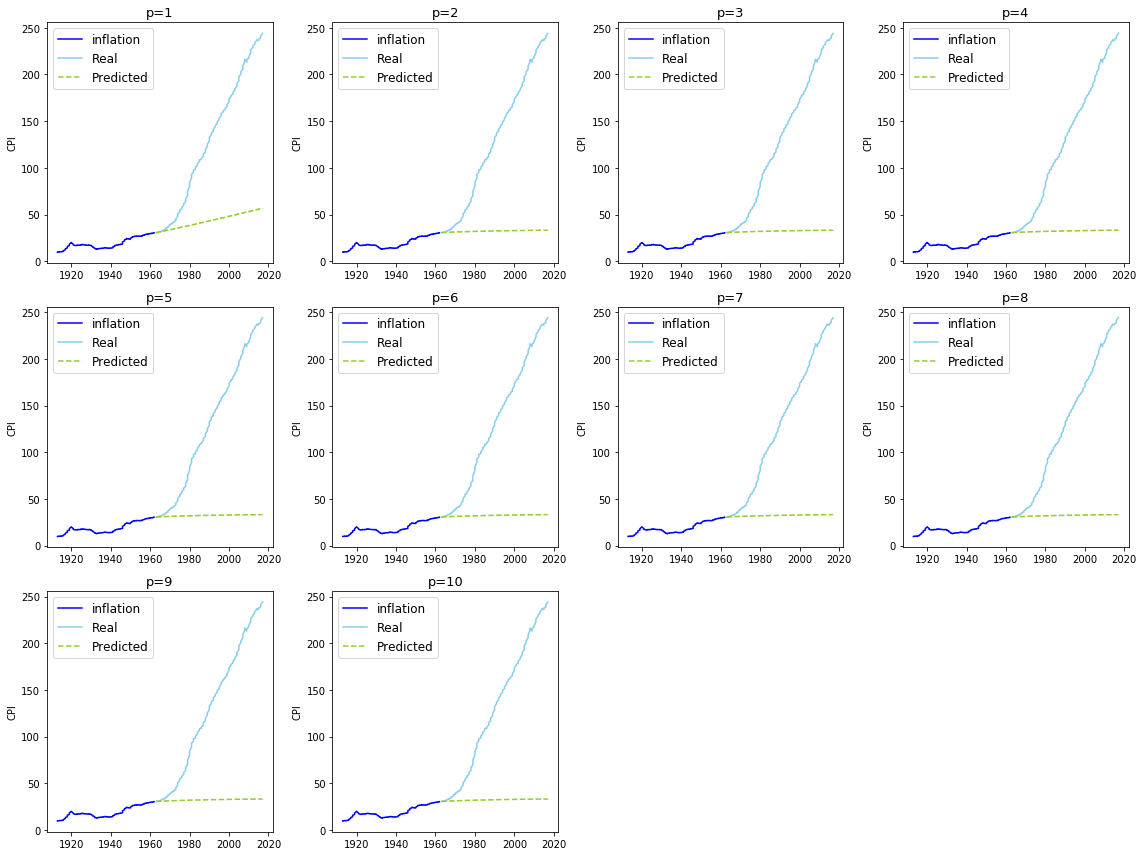

In [6]:
cutoff = 50*2
fig = plt.figure(figsize=(16, 12))
for i in range(1, 11):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(maxlag=i, ic='aic', trend='c', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(3, 4, i)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('p=%d' % i, fontsize=13)
    ax.set_ylabel('CPI')
    
    print('p=%d parameters' % i, fit_model.params)
    
plt.tight_layout()

<b>Use first 60 entries for training, rest for prediction. p-range = 1 ~ 10</b>

p=1 parameters const          -0.062747
L1.inflation    1.015558
dtype: float64
p=2 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=3 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=4 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=5 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=6 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=7 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=8 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=9 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=10 parameters const           0.029053
L1.inflation    1.632795
L2.inflation  

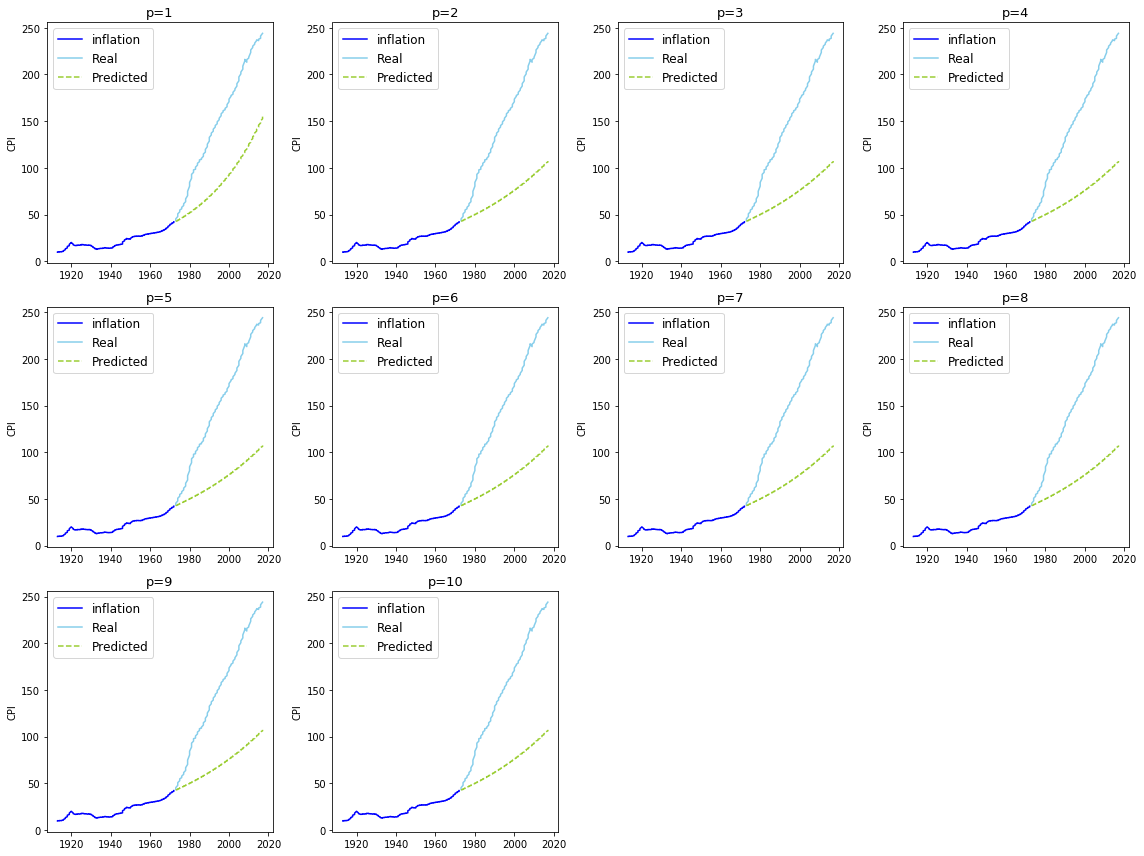

In [7]:
cutoff = 60*2
fig = plt.figure(figsize=(16, 12))
for i in range(1, 11):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(maxlag=i, ic='aic', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(3, 4, i)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('p=%d' % i, fontsize=13)
    ax.set_ylabel('CPI')

    print('p=%d parameters' % i, fit_model.params)
    
plt.tight_layout()

<b>Use first 70 entries for training, rest for prediction. p-range = 1 ~ 10</b>

p=1 parameters const          -0.721075
L1.inflation    1.048858
dtype: float64
p=2 parameters const          -0.162768
L1.inflation    1.745403
L2.inflation   -0.732993
dtype: float64
p=3 parameters const          -0.162768
L1.inflation    1.745403
L2.inflation   -0.732993
dtype: float64
p=4 parameters const          -0.162768
L1.inflation    1.745403
L2.inflation   -0.732993
dtype: float64
p=5 parameters const          -0.162768
L1.inflation    1.745403
L2.inflation   -0.732993
dtype: float64
p=6 parameters const          -0.162768
L1.inflation    1.745403
L2.inflation   -0.732993
dtype: float64
p=7 parameters const          -0.238234
L1.inflation    1.774690
L2.inflation   -0.762097
L3.inflation    0.046042
L4.inflation   -0.187232
L5.inflation   -0.064412
L6.inflation    0.451445
L7.inflation   -0.242317
dtype: float64
p=8 parameters const          -0.238234
L1.inflation    1.774690
L2.inflation   -0.762097
L3.inflation    0.046042
L4.inflation   -0.187232
L5.inflation   -0.064412


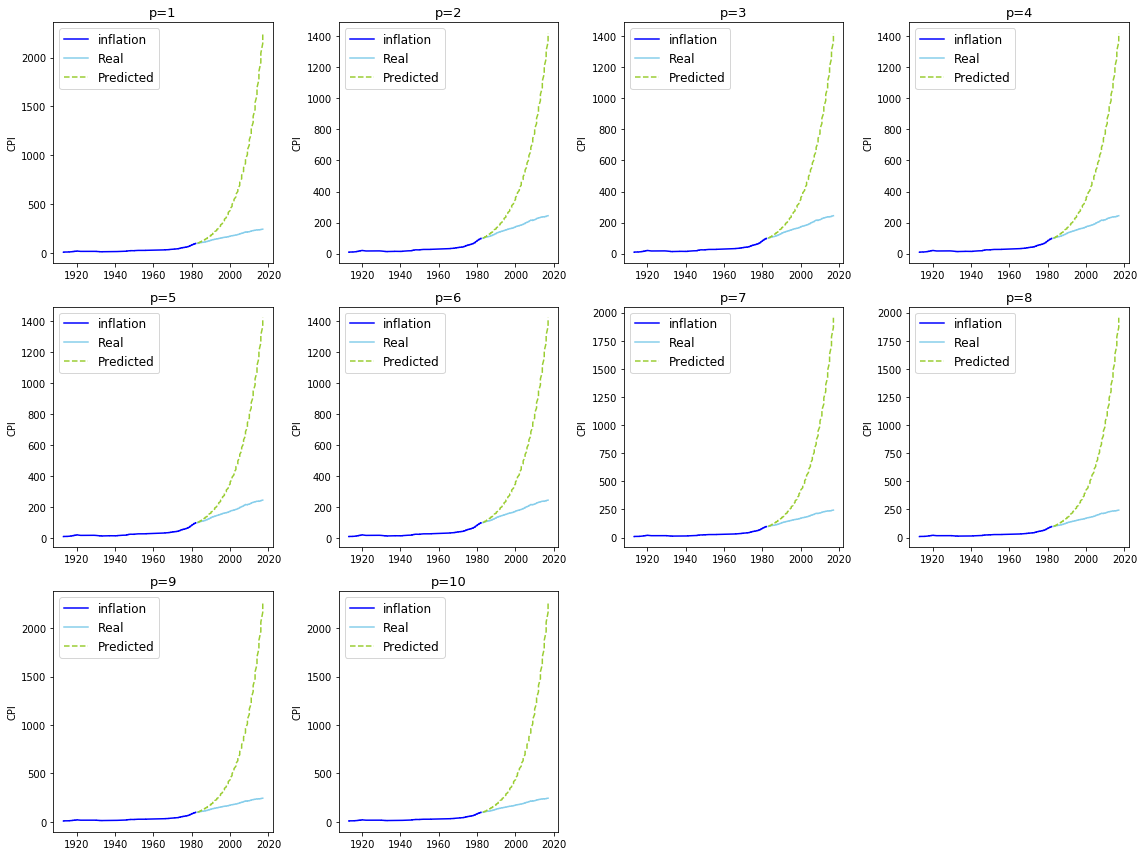

In [8]:
cutoff = 70*2
fig = plt.figure(figsize=(16, 12))
for i in range(1, 11):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(maxlag=i, ic='aic', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(3, 4, i)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('p=%d' % i, fontsize=13)
    ax.set_ylabel('CPI')

    print('p=%d parameters' % i, fit_model.params)
plt.tight_layout()

## Varying train size with whatever model the algorithm picks

p=0 parameters const           0.968893
L1.inflation    1.582241
L2.inflation   -0.643740
dtype: float64
p=1 parameters const           0.307412
L1.inflation    1.612397
L2.inflation   -0.625992
dtype: float64
p=2 parameters const           0.185777
L1.inflation    1.603519
L2.inflation   -0.609005
dtype: float64
p=3 parameters const           0.029053
L1.inflation    1.632795
L2.inflation   -0.629321
dtype: float64
p=4 parameters const          -0.261822
L1.inflation    1.799681
L2.inflation   -0.867757
L3.inflation    0.170762
L4.inflation   -0.229686
L5.inflation   -0.060283
L6.inflation    0.527504
L7.inflation   -0.605385
L8.inflation    0.516840
L9.inflation   -0.235331
dtype: float64
p=5 parameters const          -0.008033
L1.inflation    1.777801
L2.inflation   -0.772497
dtype: float64


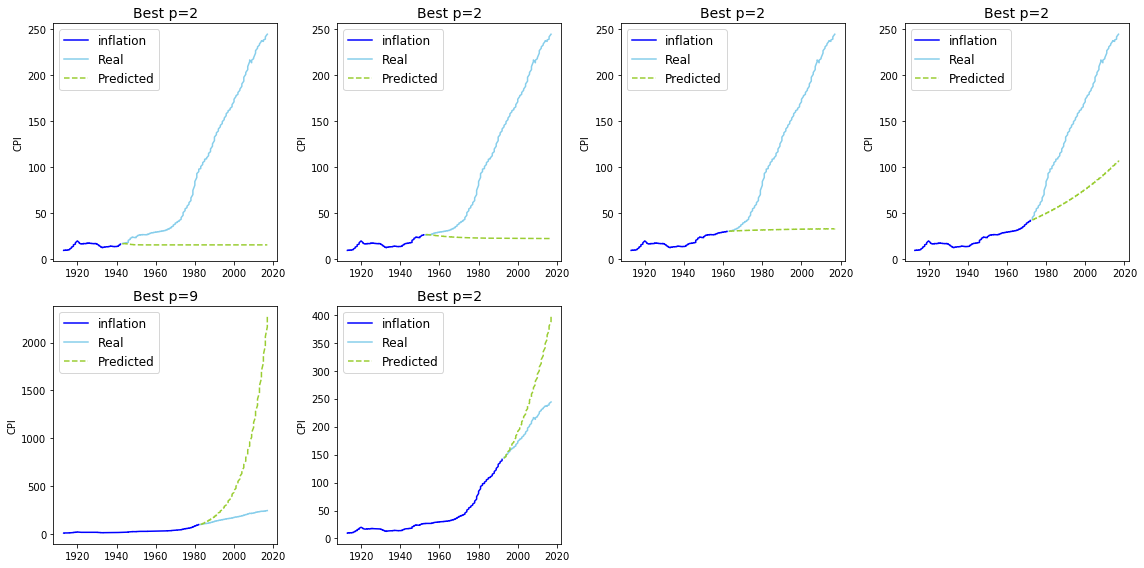

In [9]:
cutoffs = np.array([30, 40, 50, 60, 70, 80]) * 2
fig = plt.figure(figsize=(16, 8))
for i, cutoff in enumerate(cutoffs):
    d1 = data['inflation'].iloc[:cutoff]
    d2 = data['inflation'].iloc[cutoff:]
    start = d2.index[0]
    end = d2.index[-2]
    
    model = smt.AR(d1, dates=d1.index)
    fit_model = model.fit(ic='aic', maxiter=200)
    prediction = fit_model.predict(start=start, end=end)
    
    ax = fig.add_subplot(2, 4, i+1)
    ax.plot(d1.index.year, d1, color='blue')
    ax.plot(d2.index.year, d2, color='skyblue', label='Real')
    ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
    ax.legend(loc='upper left', fontsize=12)
    ax.set_title('Best p=%d' % (fit_model.k_ar), fontsize=14)
    ax.set_ylabel('CPI')

    print('p=%d parameters' % i, fit_model.params)
plt.tight_layout()

# Prediction for 1990 and later

p=5 parameters const           0.601788
L1.inflation    1.762631
L2.inflation   -0.763065
dtype: float64


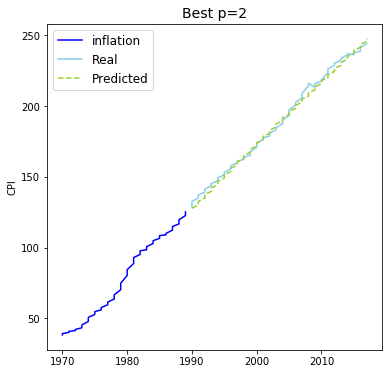

In [18]:
fig = plt.figure(figsize=(6, 6))
d1 = data['inflation'].iloc[114:154]
d2 = data['inflation'].iloc[154:]
start = d2.index[0]
end = d2.index[-2]

model = smt.AR(d1, dates=d1.index)
fit_model = model.fit(ic='aic', maxiter=200)
prediction = fit_model.predict(start=start, end=end)

ax = fig.add_subplot(1, 1, 1)
ax.plot(d1.index.year, d1, color='blue')
ax.plot(d2.index.year, d2, color='skyblue', label='Real')
ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
ax.legend(loc='upper left', fontsize=12)
ax.set_title('Best p=%d' % (fit_model.k_ar), fontsize=14)
ax.set_ylabel('CPI')

print('p=%d parameters' % i, fit_model.params)

# Prediction for 2001 and later

p=5 parameters const           0.682836
L1.inflation    1.744659
L2.inflation   -0.745653
dtype: float64


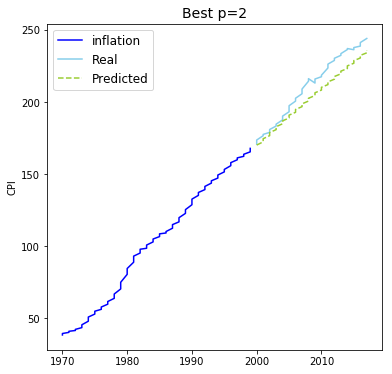

In [19]:
fig = plt.figure(figsize=(6, 6))
d1 = data['inflation'].iloc[114:174]
d2 = data['inflation'].iloc[174:]
start = d2.index[0]
end = d2.index[-2]

model = smt.AR(d1, dates=d1.index)
fit_model = model.fit(ic='aic', maxiter=200)
prediction = fit_model.predict(start=start, end=end)

ax = fig.add_subplot(1, 1, 1)
ax.plot(d1.index.year, d1, color='blue')
ax.plot(d2.index.year, d2, color='skyblue', label='Real')
ax.plot(d2.index[1:].year, prediction, ls='--', color='yellowgreen', label='Predicted')
ax.legend(loc='upper left', fontsize=12)
ax.set_title('Best p=%d' % (fit_model.k_ar), fontsize=14)
ax.set_ylabel('CPI')

print('p=%d parameters' % i, fit_model.params)